In [35]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np

In [36]:
products_data=pd.read_csv('balancedDATA.csv')
products_data

,NameDescription,categories
0,surco a conversion bar bike rack featuresused ...,Automotive
1,kent marine turbo calcium ounce bottle turbo ...,Pet Supplies
2,inch pro style swim snorkel breathe underwater...,Sports & Outdoors
3,zia natural skincare seaweed lift serum ounce ...,Beauty
4,nexcare waterproof bandage knee amp elbow ct ...,Health & Personal Care
...,...,...
35761,palladio rice paper natural unique tissue made...,"Arts, Crafts & Sewing"
35762,learning resource tool set piece molded plasti...,Toys & Games
35763,serious skin care aeye xr nanoencapsulated eye...,Beauty
35764,wireless phone xcessories travel charger samsu...,Cell Phones & Accessories


In [37]:
products_data.categories.value_counts()

Automotive                   1987
Pet Supplies                 1987
Grocery & Gourmet Food       1987
Office Products              1987
Industrial & Scientific      1987
Tools & Home Improvement     1987
Electronics                  1987
Musical Instruments          1987
Appliances                   1987
Clothing, Shoes & Jewelry    1987
Baby Products                1987
Toys & Games                 1987
Cell Phones & Accessories    1987
Arts, Crafts & Sewing        1987
Health & Personal Care       1987
Beauty                       1987
Sports & Outdoors            1987
Patio, Lawn & Garden         1987
Name: categories, dtype: int64

# Rendre label numerique

In [38]:
l=[]
for text in products_data["categories"].unique():
    l.append(text)

y=[]
for text in products_data["categories"]:
    for j in range(18):
        if text==l[j]:
            y.append(j)
    
y = np.asarray(y)

yy = pd.Series(y)
yy

0        0
1        1
2        2
3        3
4        4
        ..
35761    5
35762    7
35763    3
35764    6
35765    7
Length: 35766, dtype: int64

# Extracting Features From TextData using TF-IDF

In [39]:
from sklearn import feature_extraction, model_selection, naive_bayes, pipeline, manifold, preprocessing

In [40]:
Text=[]
for text in products_data["NameDescription"]:
    Text.append(text)

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
# First, we need a vectorizer object
vectorizer = TfidfVectorizer()
x = vectorizer.fit_transform(Text).toarray()
xx=  pd.DataFrame(x)
xx

,0,1,2,3,4,5,6,7,8,9,...,99060,99061,99062,99063,99064,99065,99066,99067,99068,99069
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35761,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35762,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35763,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35764,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


After feature extraction from our text it gives 99070 features.

# MLP befor feature selection

# 30 iteration with default hidden layers

In [42]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=1,test_size=0.2)

In [43]:
#max_iter=500
from sklearn.neural_network import MLPClassifier
classifier = MLPClassifier(hidden_layer_sizes=(50,), max_iter=20, warm_start=True, verbose=True)
classifier.fit(x_train,y_train)

Iteration 1, loss = 2.48399221
Iteration 2, loss = 1.24738592
Iteration 3, loss = 0.61336424
Iteration 4, loss = 0.37280777
Iteration 5, loss = 0.25054427
Iteration 6, loss = 0.17698482
Iteration 7, loss = 0.12935271
Iteration 8, loss = 0.09714099
Iteration 9, loss = 0.07505820
Iteration 10, loss = 0.05966790
Iteration 11, loss = 0.04837716
Iteration 12, loss = 0.04049095
Iteration 13, loss = 0.03469553
Iteration 14, loss = 0.03015019
Iteration 15, loss = 0.02676266
Iteration 16, loss = 0.02391531
Iteration 17, loss = 0.02164451
Iteration 18, loss = 0.01987544
Iteration 19, loss = 0.01840972
Iteration 20, loss = 0.01715203


MLPClassifier(hidden_layer_sizes=(50,), max_iter=20, verbose=True,
              warm_start=True)

In [44]:
y_pred = classifier.predict(x_test)

In [45]:
from sklearn.metrics import accuracy_score
print("Number of features is", x_train.shape[1])
print("Test set accuracy of MLPClassifier Classifier is {}".format(round(accuracy_score(y_pred,y_test)*100,2)))

Number of features is 99070
Test set accuracy of MLPClassifier Classifier is 87.94


In [23]:
#save model
import pickle
pickle.dump(classifier, open('MLP87.94.pkl', 'wb'))

In [13]:
# Load model already saved
import pickle
loaded_model = pickle.load(open('MLP87.94.pkl', 'rb'))
result = loaded_model.score(x_test, y_test)
print(result)

0.8793681856304165


In [23]:
classifier = pickle.load(open("MLP87.94.pkl","rb"))
y_pred = classifier.predict(x_test)

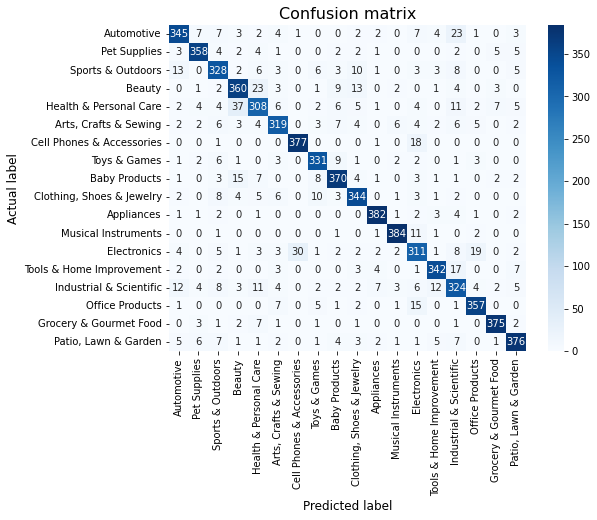

In [34]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
%matplotlib inline

#Function to plot confusion matrix for the passed model and the data
def plot_confusion_matrix(model, X_test, y_test):
    
    classes = products_data.categories.unique()
    # use model to do the prediction
    y_pred = model.predict(x_test)
    # compute confusion matrix
    cm = confusion_matrix(y_test,y_pred)
    # plot confusion matrix
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d', 
                xticklabels=classes,
                yticklabels=classes)
    plt.title('Confusion matrix', fontsize=16)
    plt.xlabel('Predicted label', fontsize=12)
    plt.ylabel('Actual label', fontsize=12)
    
plot_confusion_matrix(classifier, x_test, y_test)